# Algorithmes de descente en optimisation différentiable sans contrainte

Mettez ci-dessous les imports classiques de librairie Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as npl

Dans ce TP, nous nous intéressons aux algorithmes pour la minimisation sans contrainte de fonctionnelles très générales: le problème s'écrit:

$$\min_{x\in\mathbb{R}^n} f(x).$$

Le but de cette séance est l'écriture d'un code de minimisation locale, et l'évaluation de ses performances sur les fonctions tests suivantes:

<li>$f_1(x,y) = 2(x+y-2)^2+(x-y)^2$.
<li>$f_2(x,y) = 100(y-x^2)^2 + (1-x)^2$ (fonction de Rosenbrock).

On appelle $\textit{oracle}$ une routine qui à un $x$ donné, renvoie la valeur $f(x)$ du critère, le gradient $\nabla f(x)$ (ou une approximation du gradient) s'il existe, et éventuellement la matrice Hessienne $H[f](x)$ (ou une approximation) si elle existe et si nécessaire:

$$[f(x),\nabla f(x),H[f](x)] = \textrm{oracle}(x)$$

> **A faire :** Calculer les gradients et les Hessiennes des deux fonctions proposées et implémenter les fonctions $\textrm{oracle}$ correspondantes.

>**Réponse :** 

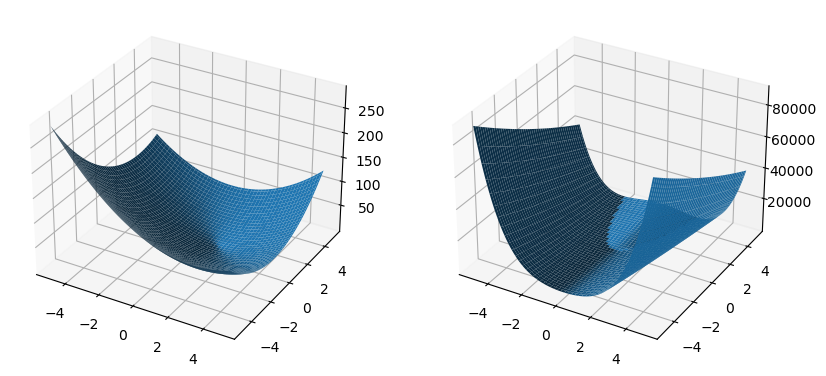

In [61]:
def oracle1(x):
    f = 2*(x[0] + x[1] - 2)**2 + (x[0] - x[1])**2
    df = np.array([4*(x[0] + x[1] - 2) + 2*(x[0] - x[1]), 4*(x[0] + x[1] - 2) - 2*(x[0] - x[1])])
    Hf = np.array([[6, 2], [2, 6]])
    return f,df,Hf


def oracle2(x):
    f = 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2
    df = np.array([2*(200*x[0]**3 - 200*x[0]*x[1] + x[0] - 1), 200*(x[1] - x[0]**2)])
    Hf = np.array([[-400*(x[1] - 3*x[0]**2) + 2, -400*x[0]], [-400*x[0], 200]])
    return f,df,Hf

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
Z1 = 2*(X + Y - 2)**2 + (X - Y)**2
Z2 = 100*(Y - X**2)**2 + (1 - X)**2

# plot oracle1 and oracle2 in 3D
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X,Y,Z1)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X,Y,Z2)
plt.show()

On rappelle qu'un algorithme de descente appliqué à la minimisation de $f$ possède la forme suivante:

* **Données :** $x_0\in \mathbb{R}^n$ point initial arbitraire, un oracle.
* **Initialisation :** Numéro d'itération: $k=0$.
* **Tant que** le critère d'arrêt n'est pas satisfait, **faire**
  * Calcul de la direction de descente $d_k$.
  * Choix/Calcul du pas $s_k$.
  * Mise à jour: calcul du prochain itéré $x_{k+1}$.
  * $k = k + 1.$

> **A faire :** Résolution mathématique:

1. Donner les points critiques des fonctions proposées.
2. Les fonctions $f_i$ admettent-elles des extrema sur $\mathbb{R}^2$?

>**Réponse :**

1.
Points critiques f1 : \begin{bmatrix}
                        1 \\
                        1
                      \end{bmatrix}              
Points critiques f2 : \begin{bmatrix}
                        1 \\
                        1
                      \end{bmatrix}     
                      \begin{bmatrix}
                        1 \\
                        -1
                      \end{bmatrix}  
2.
Oui , minimal global

> **A faire :** Implémenter deux algorithmes de mimimisation, un par méthode de gradient à pas fixe et l'autre par une méthode de Newton locale. Les arguments d'entrée sont $\textrm{function}$ qui est l'oracle à minimiser, $\textrm{xini}$ qui est le point initial et $\textrm{h}$ qui est le pas de la méthode de gradient. Les arguments de sortie sont $\textrm{x}$ la valeur finale du point trouvée, $\textrm{xiter}$ qui est la valeur du point au cours des itérations et $\textrm{iter}$ le nombre d'itérations pour arriver à convergence.

In [42]:
def Gradient(function,h=.1,xini=np.array([0,0])):
    x = xini
    f,df,Hf = function(x)
    xlist = [x]
    iter = 0
    itermax = 100
    while npl.norm(df) > 1e-1 and iter < itermax:
        iter += 1
        x = x - h*df
        f,df,Hf = function(x)
        xlist.append(x)

    return x, xlist, iter

print(Gradient(oracle1))
print()
print(Gradient(oracle2, h=.01))

(array([0.992, 0.992]), [array([0, 0]), array([0.8, 0.8]), array([0.96, 0.96]), array([0.992, 0.992])], 3)

(array([-inf,  inf]), [array([0, 0]), array([0.02, 0.  ]), array([0.039568, 0.0008  ]), array([0.05865546, 0.00233125]), array([0.07722211, 0.00454967]), array([0.09524103, 0.00737683]), array([0.11269085, 0.01076487]), array([0.12956509, 0.01463358]), array([0.1458577 , 0.01894064]), array([0.16157892, 0.02360829]), array([0.17673191, 0.0286072 ]), array([0.1913402 , 0.03386113]), array([0.2054087 , 0.03936101]), array([0.21897388, 0.04502445]), array([0.23203232, 0.05087467]), array([0.24464039, 0.05680332]), array([0.25676728, 0.06289451]), array([0.26851486, 0.06896436]), array([0.27977645, 0.0752361 ]), array([0.29078023, 0.08131362]), array([0.30119667, 0.08779266]), array([0.3116466, 0.0936462]), array([0.32107878, 0.10060101]), array([0.33145852, 0.10558216]), array([0.33915135, 0.11414734]), array([0.35117954, 0.11589993]), array([0.35372291, 0.13075421]), array([0.37462

/tmp/ipykernel_7743/1228921560.py:9: RuntimeWarning: overflow encountered in double_scalars
  f = 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2
/tmp/ipykernel_7743/1228921560.py:10: RuntimeWarning: overflow encountered in double_scalars
  df = np.array([2*(200*x[0]**3 - 200*x[0]*x[1] + x[0] - 1), 200*(x[1] - x[0]**2)])
/tmp/ipykernel_7743/1228921560.py:11: RuntimeWarning: overflow encountered in double_scalars
  Hf = np.array([[-400*(x[1] - 3*x[0]**2) + 2, -400*x[0]], [-400*x[0], 200]])
/tmp/ipykernel_7743/1228921560.py:9: RuntimeWarning: invalid value encountered in double_scalars
  f = 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2
/tmp/ipykernel_7743/1228921560.py:10: RuntimeWarning: invalid value encountered in double_scalars
  df = np.array([2*(200*x[0]**3 - 200*x[0]*x[1] + x[0] - 1), 200*(x[1] - x[0]**2)])
/tmp/ipykernel_7743/1228921560.py:11: RuntimeWarning: invalid value encountered in double_scalars
  Hf = np.array([[-400*(x[1] - 3*x[0]**2) + 2, -400*x[0]], [-400*x[0], 200]])


In [38]:
def Newton(function,xini=[0,0]):
    x = xini
    f,df,Hf = function(x)
    xlist = [x]
    iter = 0
    while npl.norm(df) > 1e-5:
        iter += 1
        x = x - npl.inv(Hf).dot(df)
        f,df,Hf = function(x)
        xlist.append(x)

    return x, xlist, iter

print(Newton(oracle1))
print()
print(Newton(oracle2))

(array([1., 1.]), [[0, 0], array([1., 1.])], 1)

(array([1., 1.]), [[0, 0], array([1., 0.]), array([1., 1.])], 2)


> **A faire :** En utilisant le module $\textrm{matplotlib.pyplot}$, on veut représenter/dessiner la suite des itérés dans $\mathbb{R}^2$ avec la fonction $\textrm{scatter}$.On souhaite aussi représenter les fonctions $f_1$ et $f_2$ en utilisant la fonction $\textrm{contour}$ du module $\textrm{matplotlib.pyplot}$. On s'inspirera du code qui suit pour créer deux fonctions (une pour chaque oracle) $\textrm{affichage1(xiter)}$ et $\textrm{affichage2(xiter)}$ qui affiche représente les itérations.

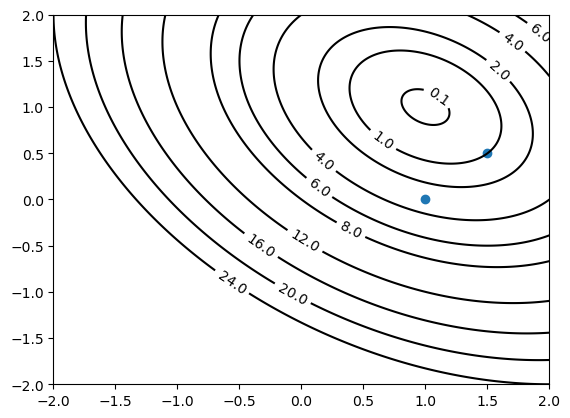

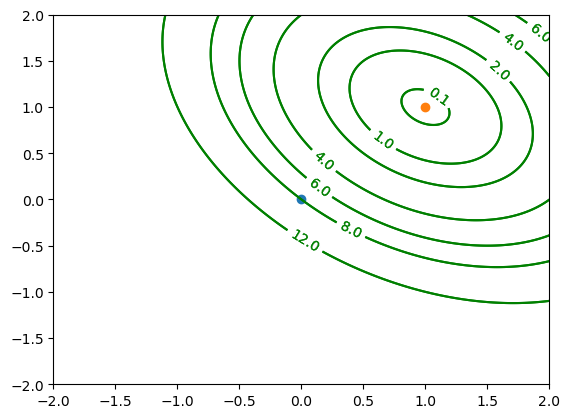

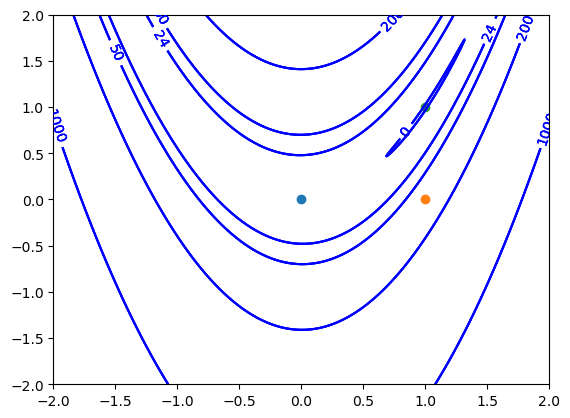

In [53]:
Nx = 1000
Ny = 1000
x = np.linspace(-2,2,Nx)
y = np.linspace(-2,2,Ny)
X, Y = np.meshgrid(x, y)
Z = 2*(X+Y-2)**2+(X-Y)**2
Z1 = 2*(X + Y - 2)**2 + (X - Y)**2
Z2 = 100*(Y - X**2)**2 + (1 - X)**2

CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
plt.clabel(CS, inline=1, fontsize=10)
z = [[1,1.5],[0,0.5]]
plt.scatter(z[0],z[1],marker='o')
plt.show()

def affichage1(xiter) :
    CS=plt.contour(X, Y, Z1,[0,0.1,1,2,4,6,8,12],colors='g')
    plt.clabel(CS, inline=1, fontsize=10)
    plt.scatter(xiter[0], xiter[1])
def affichage2(xiter) :
    CS=plt.contour(X, Y, Z2,[0,0.1,24,50,200,1000],colors='b')
    plt.clabel(CS, inline=1, fontsize=10)
    plt.scatter(xiter[0], xiter[1], marker='o')
    
for z in Newton(oracle1)[1]:
    affichage1(np.array(z))
plt.show()

for z in Newton(oracle2)[1]:
    affichage2(np.array(z))
plt.show()

Tester la méthode de Newton et la méthode de gradient pour différents points de départ et différents pas pour la fonction oracle1. Conclure

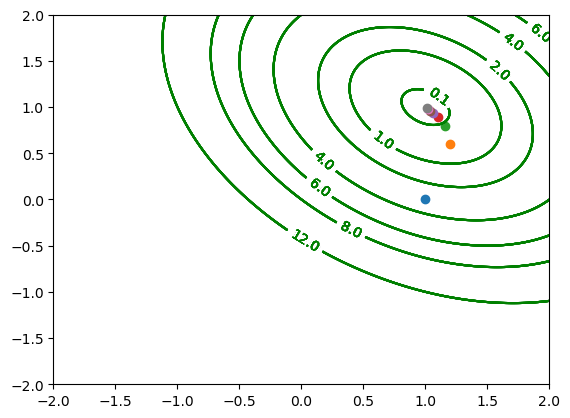

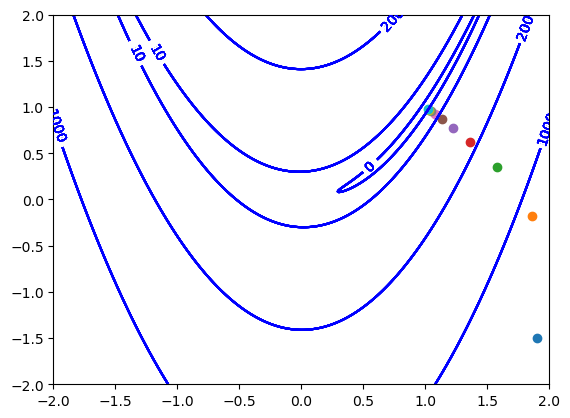

In [60]:
for z in Gradient(oracle1, h=1e-1, xini=[1,0])[1]:
    affichage1(np.array(z))
plt.show()

for z in Gradient(oracle1, h=1e-1, xini=[1.9,-1.5])[1]:
    CS=plt.contour(X, Y, Z2,[0,0.5,10,200,1000, 1e5, 1e10],colors='b')
    plt.clabel(CS, inline=1, fontsize=10)
    plt.scatter(z[0], z[1], marker='o')
plt.show()

